In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
dfplus10 = pd.read_csv("Sensitivity Analysis Results plus 10%.csv", index_col = 0, header = 0)
dfminus10 = pd.read_csv("Sensitivity Analysis Results minus 10%.csv", index_col = 0, header = 0)
dfplus25 = pd.read_csv("Sensitivity Analysis Results plus 25%.csv", index_col = 0, header = 0)
dfminus25 = pd.read_csv("Sensitivity Analysis Results minus 25%.csv",  index_col = 0, header = 0)

In [100]:
dfplus10.drop(columns = ["Base_Value", "Changed_Value"], inplace = True)
dfminus10.drop(columns = ["Base_Value", "Changed_Value"], inplace = True)
dfplus25.drop(columns = ["Base_Value", "Changed_Value"], inplace = True)
dfminus25.drop(columns = ["Base_Value", "Changed_Value"], inplace = True)

In [101]:
dfplus10.head()

,Expenditure_per_capita,Failure_Count
Variable_Name,,
recycling target,1234.984228,75.37
eta,1241.262429,67.81
theta old,1251.896056,93.88
theta single,1217.590661,90.77
theta family,1266.593447,91.78


In [102]:
MergedDf = pd.merge(dfplus10, dfminus10, suffixes=["_Plus10", "_Minus10"], left_index=True, right_index=True)
MergedDf = pd.merge(MergedDf, dfplus25, left_index=True, right_index=True)
MergedDf.rename(columns = {"Expenditure_per_capita" : "Expenditure_per_capita_Plus25",\
                           "Failure_Count" : "Failure_Count_Plus25"}, inplace=True)
MergedDf = pd.merge(MergedDf, dfminus25, left_index=True, right_index=True)
MergedDf.rename(columns = {"Expenditure_per_capita" : "Expenditure_per_capita_Minus25",\
                           "Failure_Count" : "Failure_Count_Minus25"}, inplace = True)

In [132]:
MergedDf.head()

,Expenditure_per_capita_Plus10,Failure_Count_Plus10,Expenditure_per_capita_Minus10,Failure_Count_Minus10,Expenditure_per_capita_Plus25,Failure_Count_Plus25,Expenditure_per_capita_Minus25,Failure_Count_Minus25
Variable_Name,,,,,,,,
recycling target,1234.984228,75.37,1238.026871,81.24,1240.567847,73.05,1235.634800,89.98
eta,1241.262429,67.81,1242.877601,79.43,1293.315086,78.80,1288.486650,83.50
theta old,1251.896056,93.88,1242.840639,78.45,1264.678892,92.38,1246.073669,91.73
theta single,1217.590661,90.77,1250.539970,70.76,1288.047506,91.72,1249.834682,88.08
theta family,1266.593447,91.78,1249.541533,91.99,1255.901028,90.40,1267.612928,87.23


In [107]:
ExpenditureDf= MergedDf.iloc[:,[0,2,4,6]]

In [116]:
ExpenditureDf = ExpenditureDf.T

In [143]:
ExpenditureDf.rename({"Expenditure_per_capita_Plus10": "+10%", "Expenditure_per_capita_Minus10" : "-10%",\
                      "Expenditure_per_capita_Plus25": "+25%", "Expenditure_per_capita_Minus25" : "-25%"}, axis = 'index', inplace=True)

In [145]:
ExpenditureDf.head()

Variable_Name,recycling target,eta,theta old,theta single,theta family,theta couple,investment multiplier,betas decrease multiplier,investment cost,recycling target increase,num municipalities,num RC
+10%,1234.984228,1241.262429,1251.896056,1217.590661,1266.593447,1227.623837,1282.434659,1222.809326,1263.824411,1249.291541,1260.283164,1243.334135
-10%,1238.026871,1242.877601,1242.840639,1250.539970,1249.541533,1231.923992,1260.781905,1254.839222,1257.598061,1268.949322,1243.309423,1252.087254
+25%,1240.567847,1293.315086,1264.678892,1288.047506,1255.901028,1245.430465,1236.703370,1245.509519,1267.410055,1230.283531,1241.700121,1251.431919
-25%,1235.634800,1288.486650,1246.073669,1249.834682,1267.612928,1253.463168,1246.712939,1251.798805,1284.315589,1258.177329,1232.808016,1241.769015


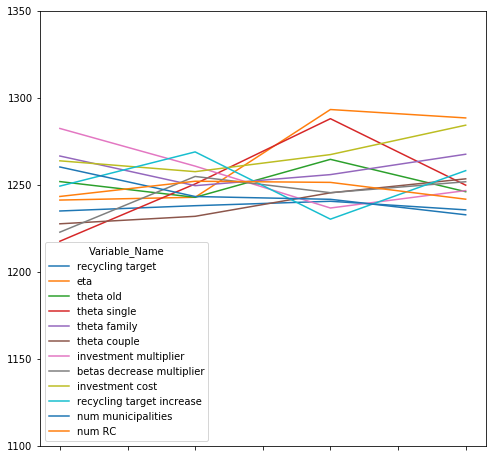

In [176]:
ax = ExpenditureDf.plot(figsize=(8,8), yticks = range(1100,1400,50))

In [170]:
FailureCountDf = MergedDf.iloc[:,[1,3,5,7]]
FailureCountDf.head()

,Failure_Count_Plus10,Failure_Count_Minus10,Failure_Count_Plus25,Failure_Count_Minus25
Variable_Name,,,,
recycling target,75.37,81.24,73.05,89.98
eta,67.81,79.43,78.80,83.50
theta old,93.88,78.45,92.38,91.73
theta single,90.77,70.76,91.72,88.08
theta family,91.78,91.99,90.40,87.23


In [171]:
FailureCountDf = FailureCountDf.T

In [172]:
FailureCountDf

Variable_Name,recycling target,eta,theta old,theta single,theta family,theta couple,investment multiplier,betas decrease multiplier,investment cost,recycling target increase,num municipalities,num RC
Failure_Count_Plus10,75.37,67.81,93.88,90.77,91.78,90.45,98.98,110.38,89.18,102.23,93.31,84.24
Failure_Count_Minus10,81.24,79.43,78.45,70.76,91.99,80.14,82.70,85.74,86.78,89.42,88.48,91.66
Failure_Count_Plus25,73.05,78.80,92.38,91.72,90.40,102.67,82.77,80.01,86.61,89.68,90.19,88.38
Failure_Count_Minus25,89.98,83.50,91.73,88.08,87.23,77.47,96.29,81.34,78.35,84.18,105.63,88.74


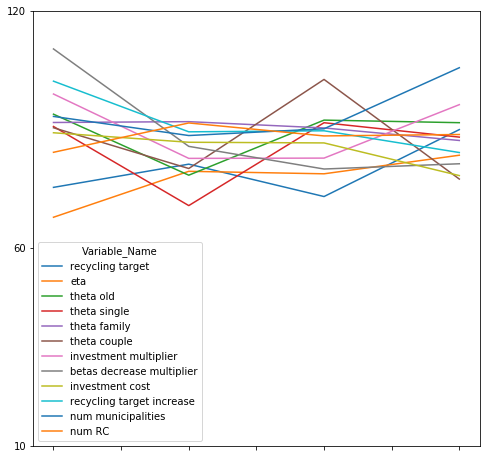

In [175]:
FailureCountDf.plot(figsize=(8,8), yticks = (60,120,10))